In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import OneHotEncoder      
from sklearn.model_selection import KFold   
from statistics import mean
import joblib

In [ ]:
file_path = 'dataset/global_bleaching_environmental.csv'

raw_data= pd.read_csv(file_path)
raw_data.head()

In [14]:
# List of necessary features
necessary_features = [
    'Latitude_Degrees',
    'Longitude_Degrees',
    'Ocean_Name',
    'Realm_Name',
    'Ecoregion_Name',
    'Country_Name',
    'State_Island_Province_Name',
    'Distance_to_Shore',
    'Exposure',
    'Turbidity',
    'Cyclone_Frequency',
    'Depth_m',
    'Percent_Cover',
    'Bleaching_Level',
    'Percent_Bleaching',
    'Temperature_Mean',
    'Temperature_Maximum',
    'Temperature_Kelvin',
    'Windspeed',
    'SSTA_Maximum',
    'SSTA_DHW',
    'Date'
]

# Drop columns that are not in the necessary_features list
df_filtered = raw_data[necessary_features]

# Optionally, save the filtered DataFrame to a new CSV file
df_filtered.to_csv('./dataset/global_bleaching_environmental_filtered.csv', index=False)

In [15]:
# Convert columns to numeric, coercing errors to NaN
numeric_columns = [
    'Latitude_Degrees',
    'Longitude_Degrees',
    'Distance_to_Shore',
    'Cyclone_Frequency',
    'Turbidity',
    'Depth_m',
    'Percent_Cover',
    'Percent_Bleaching',
    'Temperature_Mean',
    'Temperature_Maximum',
    'Temperature_Kelvin',
    'Windspeed',
    'SSTA_Maximum',
    'SSTA_DHW'
]

for col in numeric_columns:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')

# Display the info of the DataFrame to verify changes
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41361 entries, 0 to 41360
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Latitude_Degrees            41361 non-null  float64
 1   Longitude_Degrees           41361 non-null  float64
 2   Ocean_Name                  41361 non-null  object 
 3   Realm_Name                  41361 non-null  object 
 4   Ecoregion_Name              41361 non-null  object 
 5   Country_Name                41361 non-null  object 
 6   State_Island_Province_Name  41361 non-null  object 
 7   Distance_to_Shore           41359 non-null  float64
 8   Exposure                    41361 non-null  object 
 9   Turbidity                   41355 non-null  float64
 10  Cyclone_Frequency           41361 non-null  float64
 11  Depth_m                     39562 non-null  float64
 12  Percent_Cover               28906 non-null  float64
 13  Bleaching_Level             413

C:\Users\DELL\AppData\Local\Temp\ipykernel_22728\1130041039.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')


In [16]:
summary_stats = df_filtered.describe()
print(summary_stats)

       Latitude_Degrees  Longitude_Degrees  Distance_to_Shore     Turbidity  \
count      41361.000000       41361.000000       41359.000000  41355.000000   
mean           7.558085          34.966127        3761.764707      0.067095   
std           15.732185         103.404598       13550.414805      0.063013   
min          -30.262500        -179.974300           3.200000      0.000000   
25%           -4.902500         -78.385600         124.740000      0.033500   
50%           10.776100          96.843300         457.520000      0.052200   
75%           20.050500         120.880400        1785.540000      0.079400   
max           36.750000         179.964500      299218.500000      1.284500   

       Cyclone_Frequency       Depth_m  Percent_Cover  Percent_Bleaching  \
count       41361.000000  39562.000000   28906.000000       34515.000000   
mean           52.159650      6.922119      19.418280           9.619465   
std             7.589593      4.162464      20.850784       

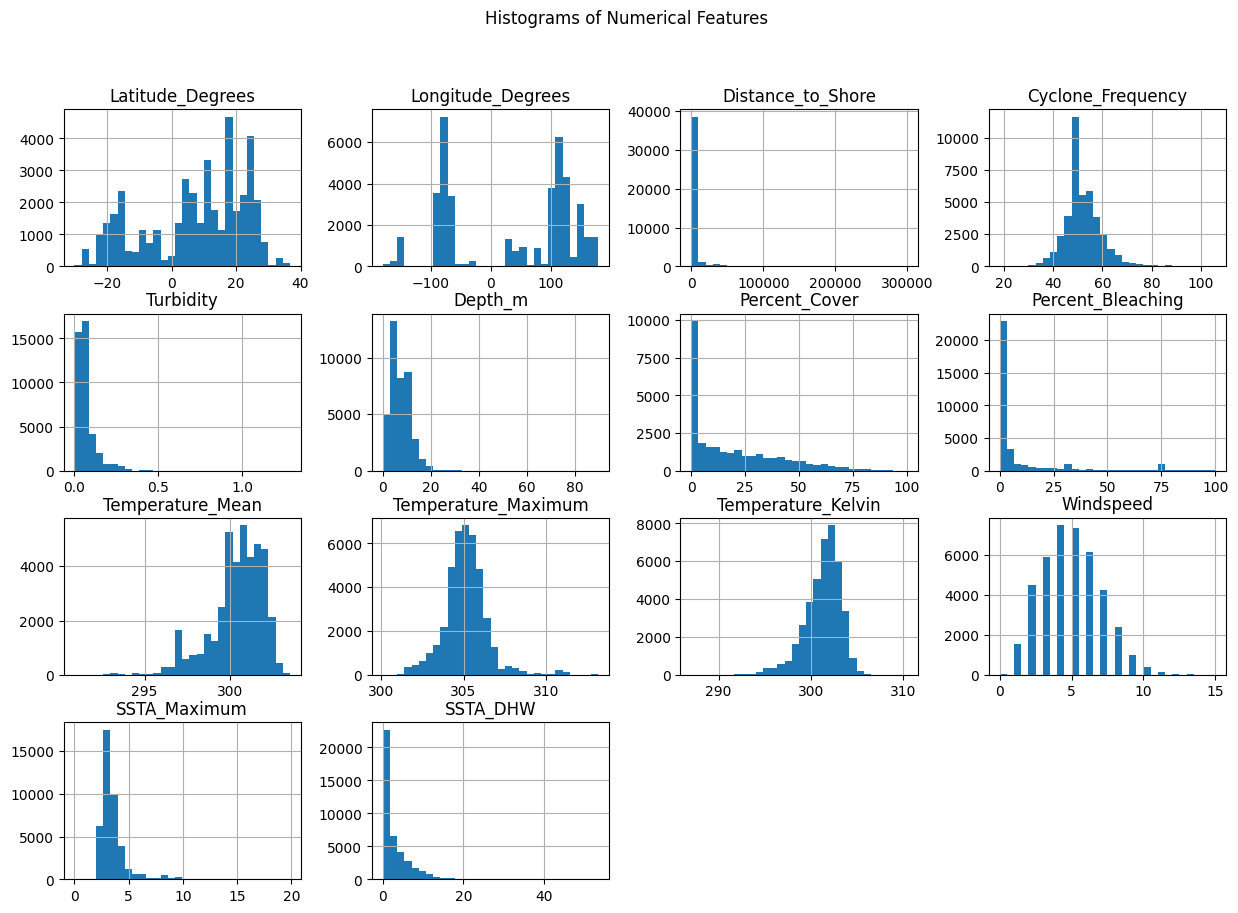

In [17]:
df_filtered[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

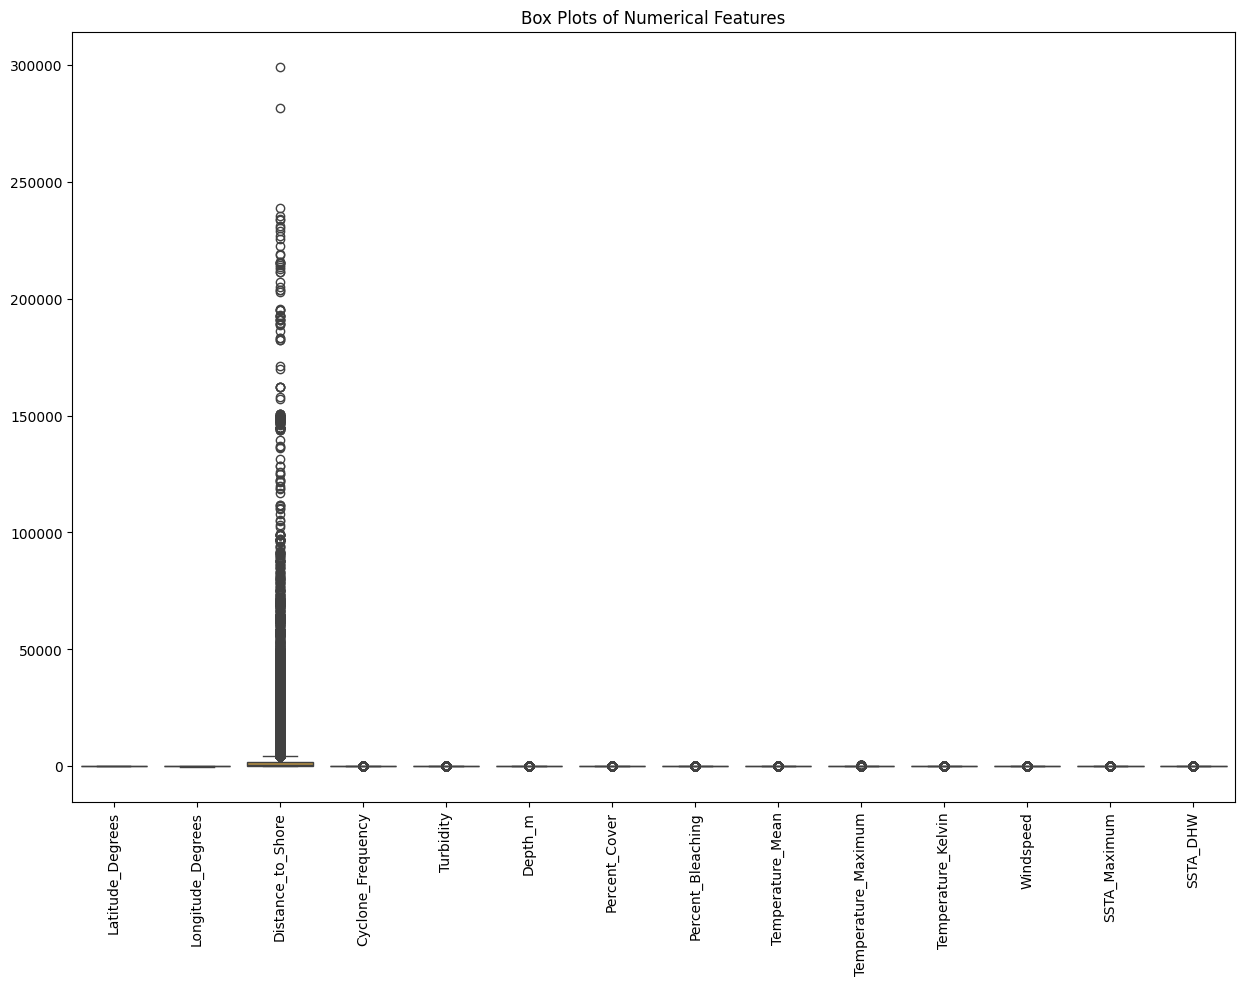

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtered[numeric_columns])
plt.xticks(rotation=90)
plt.title('Box Plots of Numerical Features')
plt.show()

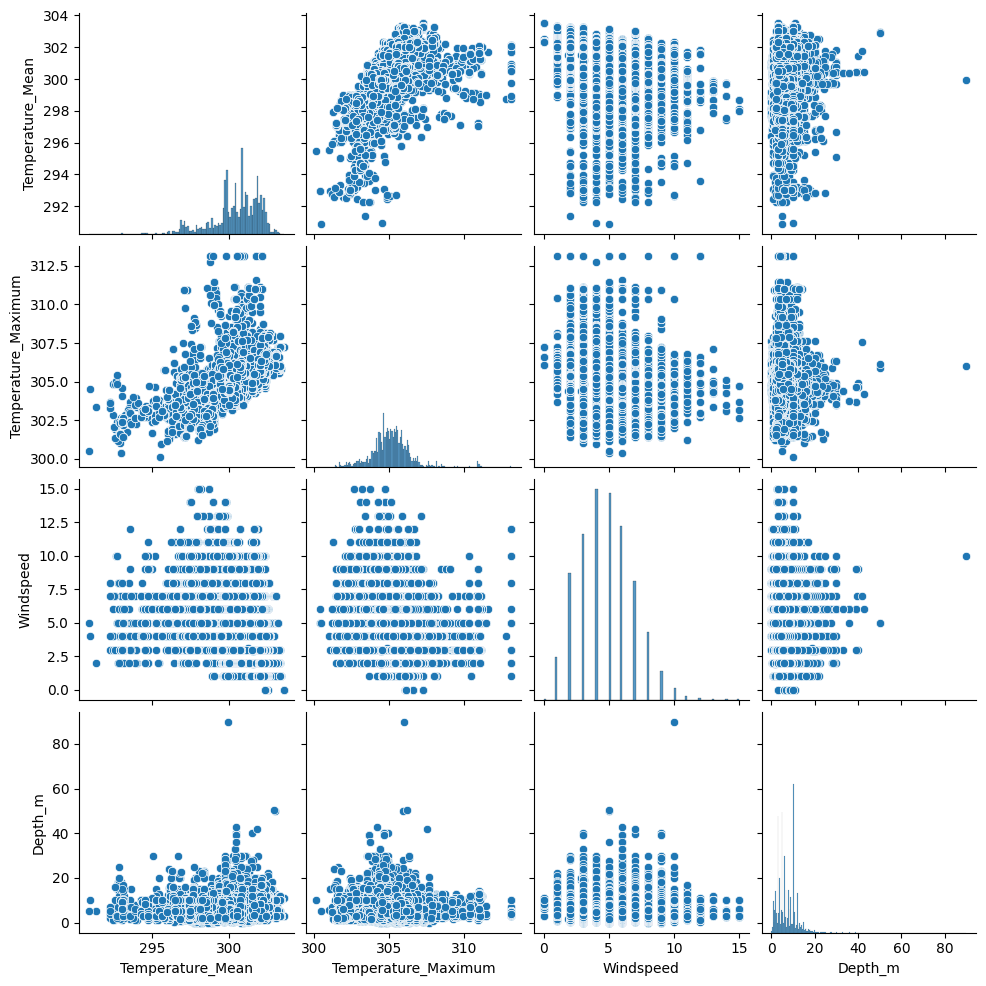

In [19]:
# Pair plots for selected numerical features
features_to_plot = ["Temperature_Mean", "Temperature_Maximum", "Windspeed", "Depth_m"]
sns.pairplot(df_filtered[features_to_plot])
plt.show()

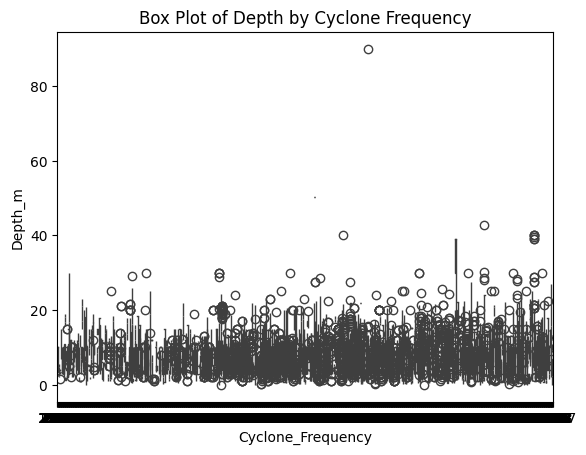

In [20]:
# Box plot for a numerical feature across different categories
sns.boxplot(x='Cyclone_Frequency', y='Depth_m', data=df_filtered)
plt.title('Box Plot of Depth by Cyclone Frequency')

plt.show()

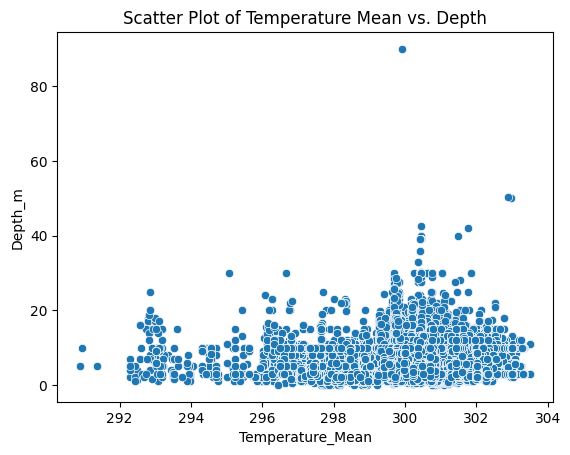

In [21]:
# Scatter plot of Temperature_Mean vs. Depth_m
sns.scatterplot(x='Temperature_Mean', y='Depth_m', data=df_filtered)
plt.title('Scatter Plot of Temperature Mean vs. Depth')

plt.show()